<a href="https://colab.research.google.com/github/Abbhiraami/ML_AI_masters/blob/main/practice_books/CNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
## Import Tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense

In [7]:
(train_images,train_labels),(test_images,test_labels) = datasets.fashion_mnist.load_data()

In [8]:
print(train_labels.shape)
print(test_labels.shape)


(60000,)
(10000,)


In [10]:
## Reshape data to include channel dimension (grayscale images have 1 channel) - Expected dimension of architecture
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [11]:
# Normalize pixel values to between 0 and 1
# grayscale is 255
train_images, test_images = train_images / 255.0, test_images / 255.0

In [17]:
# Define class names for Fashion MNIST (Available in documentation of data) --> 10 Classes
class_names =  [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

In [26]:
# Function to plot sample images
def plot_sample_images(images, labels, class_names, num_images=10):
  plt.figure(figsize=(1,num_images) )
  for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(class_names[labels[i]])
    plt.axis('off')
    plt.show()

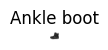

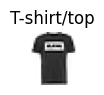

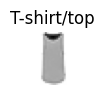

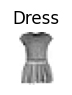

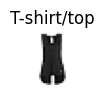

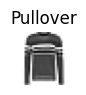

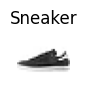

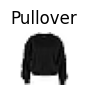

In [27]:
plot_sample_images(train_images,train_labels,class_names,num_images=8)

In [30]:
model = models.Sequential()

model.add(Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1))) # No. of kernels, No. of CNN layers,Kernel Size (Hyperparameters)

model.add(MaxPooling2D((2,2))) # Pooling Size (Hyperparameter)

model.add(Conv2D(16, (3,3),activation='relu')) # No. of kernels,Kernel Size (Hyperparameter)

model.add(MaxPooling2D((2,2))) # Pooling Size (Hyperparameter)

model.add(Conv2D(8, (3,3),activation='relu')) # No. of kernels,Kernel Size (Hyperparameter)

model.add(Flatten())

model.add(Dense(64,activation='relu')) # No. of neurons and dense layers (Hyperparameter)

model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 8)             │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 72)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,426 (44.63 KB)

 Trainable params: 11,426 (44.63 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# Train the model
history = model.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels)) #No. of Epochs (Hyperparameter)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.6977 - loss: 0.8403 - val_accuracy: 0.8237 - val_loss: 0.4688
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - accuracy: 0.8460 - loss: 0.4207 - val_accuracy: 0.8542 - val_loss: 0.4087
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8691 - loss: 0.3560 - val_accuracy: 0.8696 - val_loss: 0.3663


In [34]:
60000/32#--> 1875

1875.0

In [35]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - 6ms/step - accuracy: 0.8696 - loss: 0.3663
Test accuracy: 0.8695999979972839


model.predict(train_images).shape

In [41]:
out=model.predict(train_images)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step


In [42]:
out

array([[8.5947363e-08, 3.6254727e-07, 2.3679632e-08, ..., 9.3765967e-03,
        9.3172064e-05, 9.8968947e-01],
       [9.9763942e-01, 5.1431606e-09, 1.3772609e-04, ..., 3.5894582e-12,
        2.2067508e-05, 2.4557267e-10],
       [5.6193817e-01, 1.2059091e-02, 1.3247899e-02, ..., 9.5866337e-05,
        2.5923401e-03, 3.9585841e-05],
       ...,
       [3.7660217e-03, 1.0651407e-05, 1.0561369e-02, ..., 1.0254944e-08,
        2.8246818e-06, 1.9579723e-11],
       [9.1157883e-01, 3.6822876e-04, 1.3902137e-02, ..., 4.8509202e-07,
        6.7059638e-04, 1.0710652e-06],
       [2.4123835e-07, 8.8049940e-10, 1.6217870e-08, ..., 3.5611172e-06,
        1.0635031e-05, 1.3183306e-07]], dtype=float32)

In [45]:
output_label=[np.argmax(out[i]) for i in range(len(out))]
output_label

[np.int64(9),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(3),
 np.int64(2),
 np.int64(7),
 np.int64(4),
 np.int64(5),
 np.int64(5),
 np.int64(0),
 np.int64(9),
 np.int64(5),
 np.int64(5),
 np.int64(7),
 np.int64(9),
 np.int64(1),
 np.int64(0),
 np.int64(6),
 np.int64(4),
 np.int64(3),
 np.int64(1),
 np.int64(4),
 np.int64(8),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(5),
 np.int64(3),
 np.int64(4),
 np.int64(6),
 np.int64(0),
 np.int64(8),
 np.int64(5),
 np.int64(2),
 np.int64(1),
 np.int64(6),
 np.int64(6),
 np.int64(7),
 np.int64(9),
 np.int64(5),
 np.int64(9),
 np.int64(2),
 np.int64(7),
 np.int64(3),
 np.int64(0),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(7),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(6),
 np.int64(8),
 np.int64(3),
 np.int64(3),
 np.int64(5),
 np.int64(6),
 np.int64(5),
 np.int64(5),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(3),
 np.in

In [44]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)